In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
ages = np.arange(60,101)

In [14]:
# Adjust coefficient dictionaries to include Medium and Bad health explicitly
coeffs_female = {
    "Limitation Category 1": {
        "Age": -0.185,
        "Age squared": 0.002,
        "Good health": -2.190,
        "Medium health": -0.814,
        "Bad health": 0.118,
        "Constant": 4.264,
    },
    "Limitation Category 2": {
        "Age": -0.524,
        "Age squared": 0.004,
        "Good health": 12.202,
        "Medium health": 14.205,
        "Bad health": 16.052,
        "Constant": -1.236,
    },
    "Limitation Category 3": {
        "Age": -0.658,
        "Age squared": 0.005,
        "Good health": -3.755,
        "Medium health": -2.136,
        "Bad health": 0.241,
        "Constant": 17.559,
    },
}

coeffs_male = {
    "Limitation Category 1": {
        "Age": -0.242,
        "Age squared": 0.002,
        "Good health": -1.883,
        "Medium health": -0.639,
        "Bad health": 0.464,
        "Constant": 4.934,
    },
    "Limitation Category 2": {
        "Age": -0.687,
        "Age squared": 0.005,
        "Good health": -3.359,
        "Medium health": -1.454,
        "Bad health": 0.894,
        "Constant": 21.584,
    },
    "Limitation Category 3": {
        "Age": -0.679,
        "Age squared": 0.005,
        "Good health": -2.922,
        "Medium health": -1.334,
        "Bad health": 1.072,
        "Constant": 19.526,
    },
}

In [15]:
def calculate_probabilities_for_health(coeffs, ages, health_category):
    """Compute limitations with ADL probabilities for a given health category"""
    logits = {category: coeffs[category]["Constant"] +
              coeffs[category]["Age"] * ages +
              coeffs[category]["Age squared"] * (ages**2) +
              coeffs[category][health_category]  # Only the selected health category is active
              for category in coeffs}

    exp_logits = {category: np.exp(logits[category]) for category in logits}

    # Compute denominator: 1 + sum(exp(logits)) (assuming baseline category is 1)
    denominator = 1 + sum(exp_logits.values())

    probabilities = {category: exp_logits[category] / denominator for category in logits}

    return probabilities

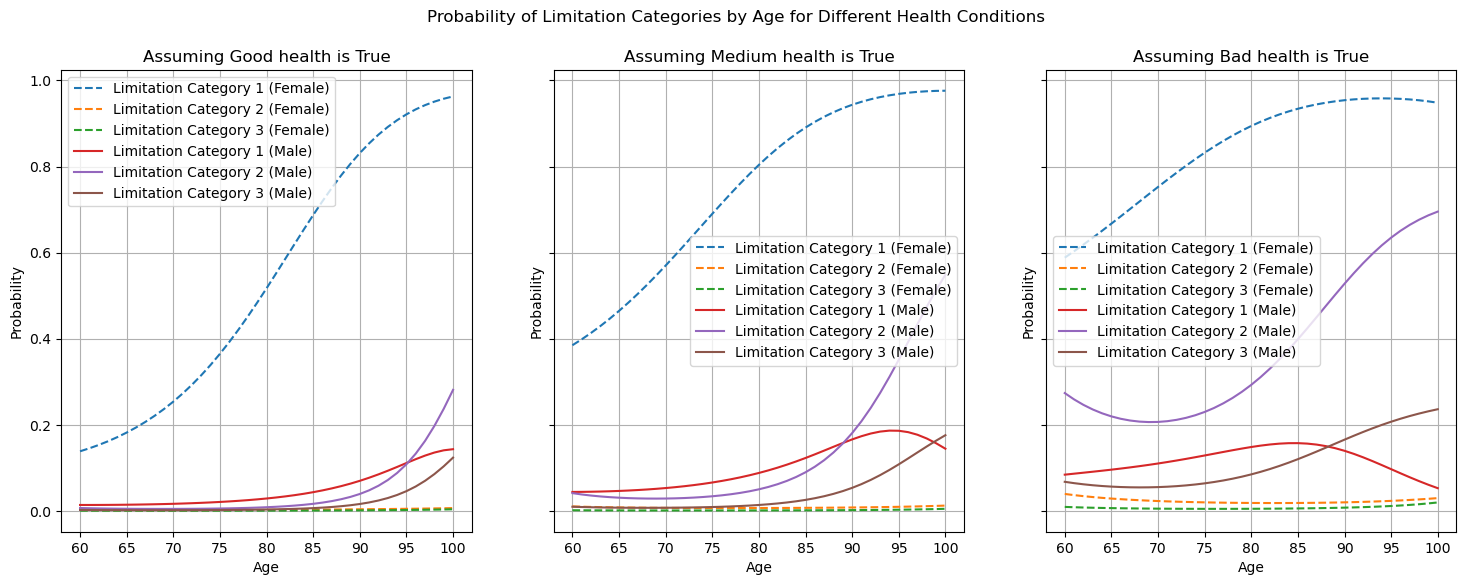

In [17]:
def plot_probabilities_by_health(coeffs_female, coeffs_male, ages):
    """Plot probability of limitation categories by age for different health conditions."""
    health_categories = ["Good health", "Medium health", "Bad health"]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Probability of Limitation Categories by Age for Different Health Conditions")

    for i, health in enumerate(health_categories):
        probabilities_female = calculate_probabilities_for_health(coeffs_female, ages, health)
        probabilities_male = calculate_probabilities_for_health(coeffs_male, ages, health)

        ax = axes[i]
        for category in probabilities_female:
            ax.plot(ages, probabilities_female[category], label=f"{category} (Female)", linestyle="dashed")
        for category in probabilities_male:
            ax.plot(ages, probabilities_male[category], label=f"{category} (Male)")

        ax.set_xlabel("Age")
        ax.set_ylabel("Probability")
        ax.set_title(f"Assuming {health} is True")
        ax.legend()
        ax.grid(True)

    plt.show()

# Run the plot function
plot_probabilities_by_health(coeffs_female, coeffs_male, ages)

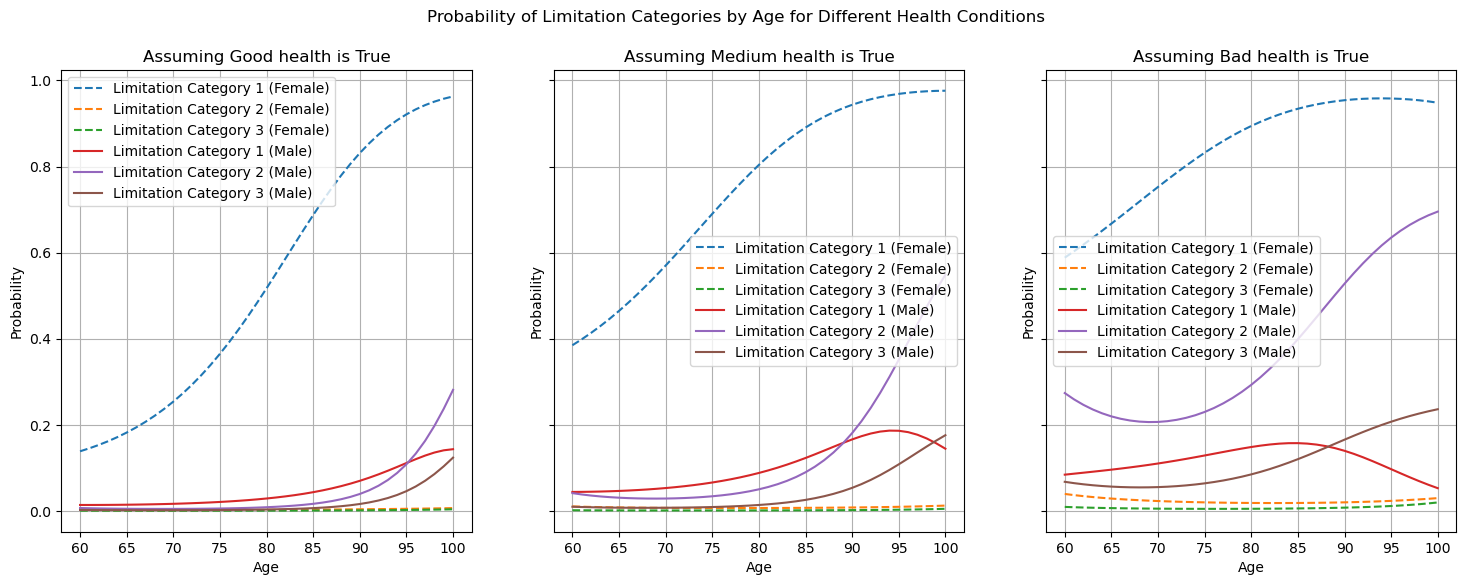

In [18]:
plot_probabilities_by_health(coeffs_female, coeffs_male, ages)

In [19]:
def plot_any_limitation_probability(coeffs_female, coeffs_male, ages):
    """Plot the probability of having any limitation (sum of all categories) for different health conditions."""
    health_categories = ["Good health", "Medium health", "Bad health"]
    fig, ax = plt.subplots(figsize=(8, 6))

    for health in health_categories:
        probabilities_female = calculate_probabilities_for_health(coeffs_female, ages, health)
        probabilities_male = calculate_probabilities_for_health(coeffs_male, ages, health)

        prob_any_female = sum(probabilities_female.values())
        prob_any_male = sum(probabilities_male.values())

        ax.plot(ages, prob_any_female, label=f"Any Limitation (Female, {health})", linestyle="dashed")
        ax.plot(ages, prob_any_male, label=f"Any Limitation (Male, {health})")

    ax.set_xlabel("Age")
    ax.set_ylabel("Probability")
    ax.set_title("Probability of Any Limitation by Age for Different Health Conditions")
    ax.legend()
    ax.grid(True)

    plt.show()

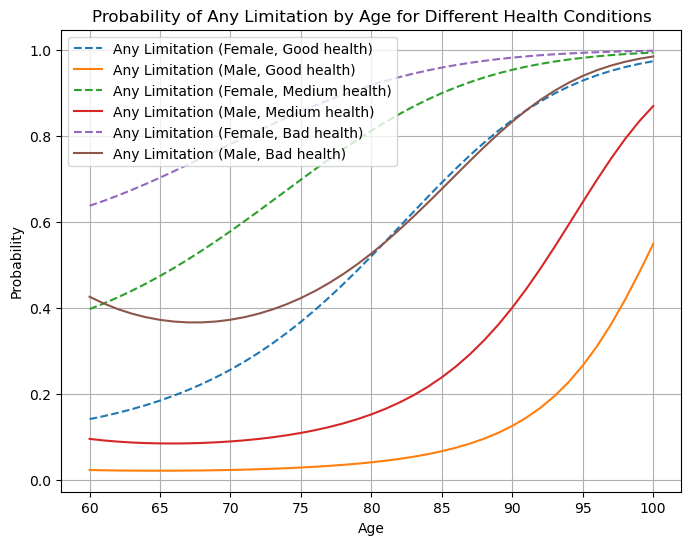

In [20]:
plot_any_limitation_probability(coeffs_female, coeffs_male, ages)

In [21]:
# Define the age range
ages = np.arange(60, 101)

# Updated coefficients for men and women
coeffs_men = {
    "category_1": {"intercept": -1.890282331069852, "medium_health": 2.0574143276604424, "bad_health": 3.817089804191427, "age": -0.1665669402757922, "age_squared": 0.0015999866836801523},
    "category_2": {"intercept": -13.299711160878298, "medium_health": 1.8790102645863471, "bad_health": 4.143345851876799, "age": 0.09195299877746783, "age_squared": 6.333906424788978e-05},
    "category_3": {"intercept": -12.810316519994869, "medium_health": 0.6599724960862714, "bad_health": 3.4287484607313674, "age": 0.06417820440477659, "age_squared": 0.0003961681370641867}
}

coeffs_women = {
    "category_1": {"intercept": 18.83140569487958, "medium_health": 1.4621006358306294, "bad_health": 2.748491869524509, "age": -0.6963456328188046, "age_squared": 0.005082212030922847},
    "category_2": {"intercept": 17.991576522651105, "medium_health": 2.4780782625676165, "bad_health": 4.687351754119179, "age": -0.728455358680924, "age_squared": 0.00533918941990674},
    "category_3": {"intercept": 3.614241302574396, "medium_health": 1.0677527932206952, "bad_health": 3.3146910168309045, "age": -0.4005397509705827, "age_squared": 0.0036380332451322064}
}

def calculate_probabilities_for_health(coeffs, ages, health_category):
    """Compute probabilities for a given health category using multinomial logit."""
    logits = {category: coeffs[category]["intercept"] +
              coeffs[category]["age"] * ages +
              coeffs[category]["age_squared"] * (ages**2) +
              coeffs[category].get(health_category, 0)
              for category in coeffs}

    exp_logits = {category: np.exp(logits[category]) for category in logits}
    denominator = 1 + sum(exp_logits.values())

    probabilities = {category: exp_logits[category] / denominator for category in logits}
    return probabilities

def plot_probabilities_by_health(coeffs_women, coeffs_men, ages):
    """Plot probability of limitation categories by age for different health conditions."""
    health_categories = ["medium_health", "bad_health"]
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    fig.suptitle("Probability of Limitation Categories by Age for Different Health Conditions")

    for i, health in enumerate(health_categories):
        probabilities_women = calculate_probabilities_for_health(coeffs_women, ages, health)
        probabilities_men = calculate_probabilities_for_health(coeffs_men, ages, health)

        ax = axes[i]
        for category in probabilities_women:
            ax.plot(ages, probabilities_women[category], label=f"{category} (Women)", linestyle="dashed")
        for category in probabilities_men:
            ax.plot(ages, probabilities_men[category], label=f"{category} (Men)")

        ax.set_xlabel("Age")
        ax.set_ylabel("Probability")
        ax.set_title(f"Assuming {health} is True")
        ax.legend()
        ax.grid(True)

    plt.show()

def plot_any_limitation_probability(coeffs_women, coeffs_men, ages):
    """Plot the probability of having any limitation (sum of all categories) for different health conditions."""
    health_categories = ["medium_health", "bad_health"]
    fig, ax = plt.subplots(figsize=(8, 6))

    for health in health_categories:
        probabilities_women = calculate_probabilities_for_health(coeffs_women, ages, health)
        probabilities_men = calculate_probabilities_for_health(coeffs_men, ages, health)

        prob_any_women = sum(probabilities_women.values())
        prob_any_men = sum(probabilities_men.values())

        ax.plot(ages, prob_any_women, label=f"Any Limitation (Women, {health})", linestyle="dashed")
        ax.plot(ages, prob_any_men, label=f"Any Limitation (Men, {health})")

    ax.set_xlabel("Age")
    ax.set_ylabel("Probability")
    ax.set_title("Probability of Any Limitation by Age for Different Health Conditions")
    ax.legend()
    ax.grid(True)

    plt.show()

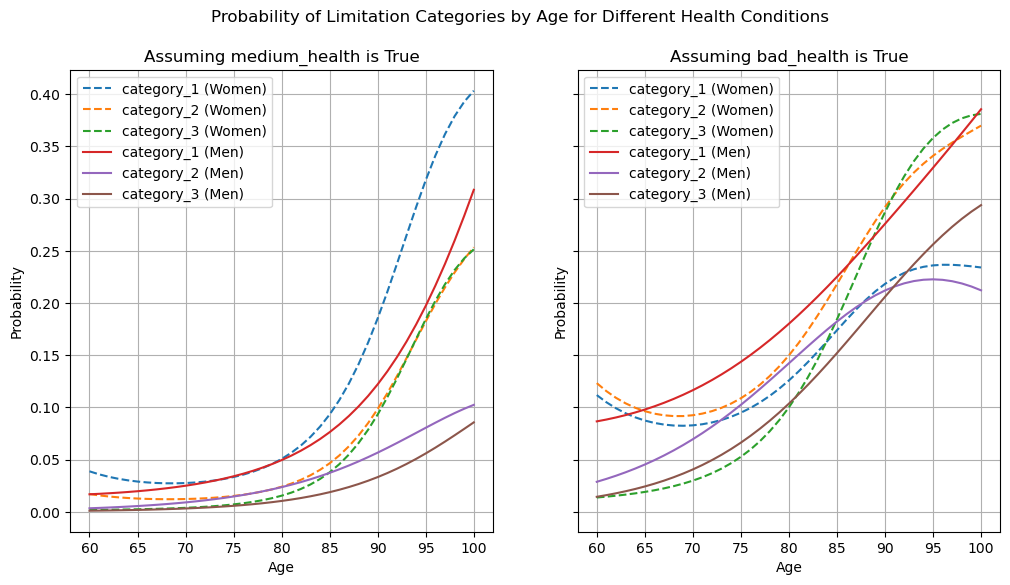

In [22]:
plot_probabilities_by_health(coeffs_women, coeffs_men, ages)

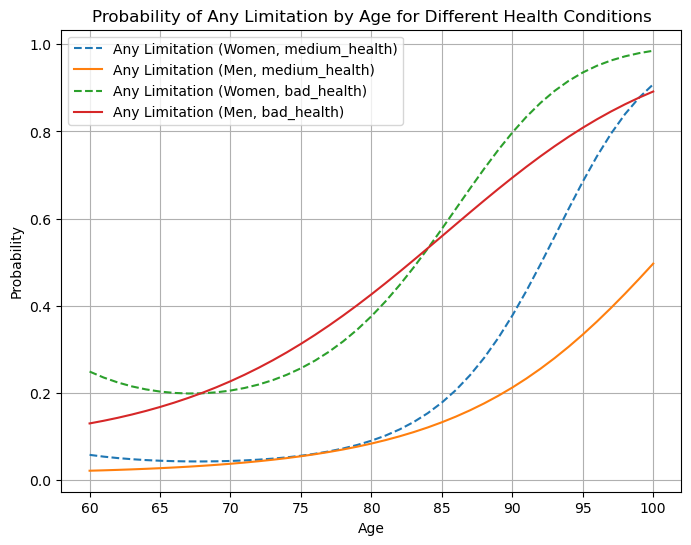

In [23]:
plot_any_limitation_probability(coeffs_women, coeffs_men, ages)

In [27]:
# Define the age range
ages = np.arange(60, 101)

# Updated coefficients for men and women
coeffs_men = {
    "category_1": {"intercept": -1.890282331069852, "medium_health": 2.0574143276604424, "bad_health": 3.817089804191427, "age": -0.1665669402757922, "age_squared": 0.0015999866836801523},
    "category_2": {"intercept": -13.299711160878298, "medium_health": 1.8790102645863471, "bad_health": 4.143345851876799, "age": 0.09195299877746783, "age_squared": 6.333906424788978e-05},
    "category_3": {"intercept": -12.810316519994869, "medium_health": 0.6599724960862714, "bad_health": 3.4287484607313674, "age": 0.06417820440477659, "age_squared": 0.0003961681370641867}
}

coeffs_women = {
    "category_1": {"intercept": 18.83140569487958, "medium_health": 1.4621006358306294, "bad_health": 2.748491869524509, "age": -0.6963456328188046, "age_squared": 0.005082212030922847},
    "category_2": {"intercept": 17.991576522651105, "medium_health": 2.4780782625676165, "bad_health": 4.687351754119179, "age": -0.728455358680924, "age_squared": 0.00533918941990674},
    "category_3": {"intercept": 3.614241302574396, "medium_health": 1.0677527932206952, "bad_health": 3.3146910168309045, "age": -0.4005397509705827, "age_squared": 0.0036380332451322064}
}

def calculate_probabilities_for_health(coeffs, ages, health_category):
    """Compute probabilities for a given health category using multinomial logit."""
    logits = {category: coeffs[category]["intercept"] +
              coeffs[category]["age"] * ages +
              coeffs[category]["age_squared"] * (ages**2) +
              coeffs[category].get(health_category, 0)
              for category in coeffs}

    exp_logits = {category: np.exp(logits[category]) for category in logits}
    denominator = 1 + sum(exp_logits.values())

    probabilities = {category: exp_logits[category] / denominator for category in logits}
    return probabilities

def plot_probabilities_by_health(coeffs_women, coeffs_men, ages):
    """Plot probability of limitation categories by age for different health conditions."""
    health_categories = ["good_health", "medium_health", "bad_health"]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Probability of Limitation Categories by Age for Different Health Conditions")

    for i, health in enumerate(health_categories):
        probabilities_women = calculate_probabilities_for_health(coeffs_women, ages, health)
        probabilities_men = calculate_probabilities_for_health(coeffs_men, ages, health)

        ax = axes[i]
        for category in probabilities_women:
            ax.plot(ages, probabilities_women[category], label=f"{category} (Women)", linestyle="dashed")
        for category in probabilities_men:
            ax.plot(ages, probabilities_men[category], label=f"{category} (Men)")

        ax.set_xlabel("Age")
        ax.set_ylabel("Probability")
        ax.set_title(f"Assuming {health} is True")
        ax.legend()
        ax.grid(True)

    plt.show()

def plot_any_limitation_probability(coeffs_women, coeffs_men, ages):
    """Plot the probability of having any limitation (sum of all categories) for different health conditions."""
    health_categories = ["good_health", "medium_health", "bad_health"]
    fig, ax = plt.subplots(figsize=(8, 6))

    for health in health_categories:
        probabilities_women = calculate_probabilities_for_health(coeffs_women, ages, health)
        probabilities_men = calculate_probabilities_for_health(coeffs_men, ages, health)

        prob_any_women = sum(probabilities_women.values())
        prob_any_men = sum(probabilities_men.values())

        ax.plot(ages, prob_any_women, label=f"Any Limitation (Women, {health})", linestyle="dashed")
        ax.plot(ages, prob_any_men, label=f"Any Limitation (Men, {health})")

    ax.set_xlabel("Age")
    ax.set_ylabel("Probability")
    ax.set_title("Probability of Any Limitation by Age for Different Health Conditions")
    ax.legend()
    ax.grid(True)

    plt.show()

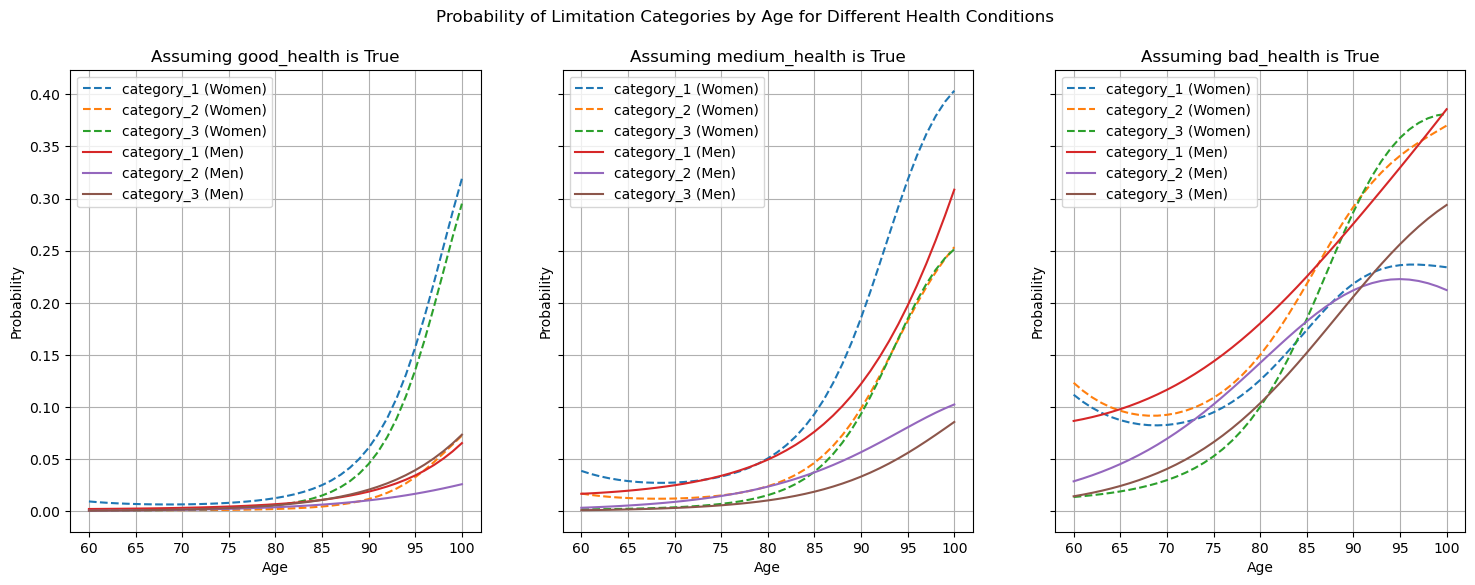

In [28]:
plot_probabilities_by_health(coeffs_women, coeffs_men, ages)

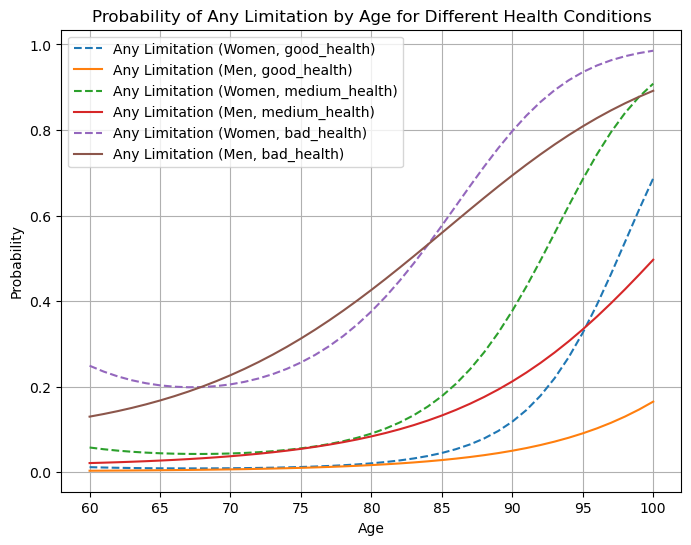

In [29]:
plot_any_limitation_probability(coeffs_women, coeffs_men, ages)